# **Data Cleaning**

In [117]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
columns=[ 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class Labels']
#read dataset
df=pd.read_csv('/content/iris.data',names=columns)

In [119]:
#display 1st 5 rows
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
#display last 5 rows
df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Labels
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# **Analyse and Visualize**

In [121]:
df.shape

(150, 5)

In [122]:
#to know the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class Labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [123]:
#Statistical analysis
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
#to display no.of samples in each class
df['Class Labels'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class Labels, dtype: int64

# ***PREPROCESSING / Cleaning***

In [125]:
#check for null value
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class Labels    0
dtype: int64

# ***EXPLORATORY DATA ANALYSIS (EDA)***

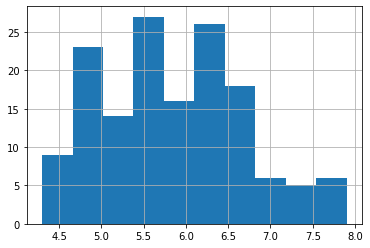

In [126]:
#Histogram for each Column
df['Sepal Length'].hist() 

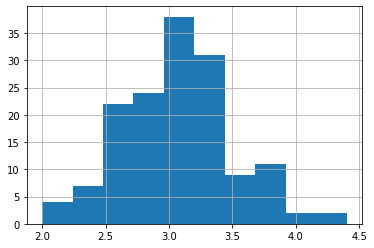

In [127]:
df['Sepal Width'].hist()
#normal distribution- easily learn from data

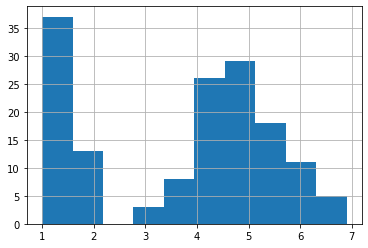

In [128]:
df['Petal Length'].hist()

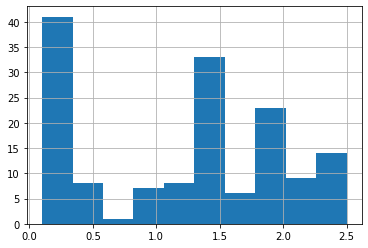

In [129]:
df['Petal Width'].hist()

In [130]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica', 'Iris-versicolor','Iris-setosa']

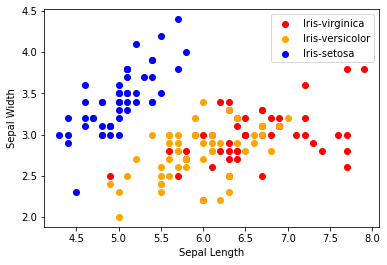

In [131]:
for i in range(3):
  x=df[df['Class Labels']==species[i]]
  plt.scatter(x['Sepal Length'],x['Sepal Width'],c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

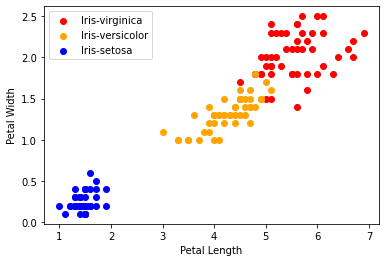

In [132]:
for i in range(3):
  x=df[df['Class Labels']==species[i]]
  plt.scatter(x['Petal Length'],x['Petal Width'],c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

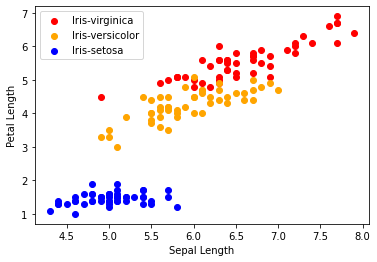

In [133]:
for i in range(3):
  x=df[df['Class Labels']==species[i]]
  plt.scatter(x['Sepal Length'],x['Petal Length'],c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

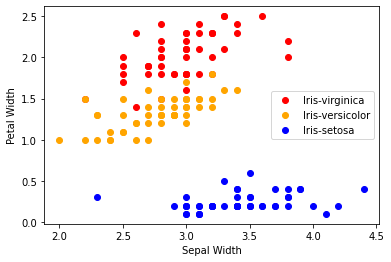

In [134]:
for i in range(3):
  x=df[df['Class Labels']==species[i]]
  plt.scatter(x['Sepal Width'],x['Petal Width'],c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

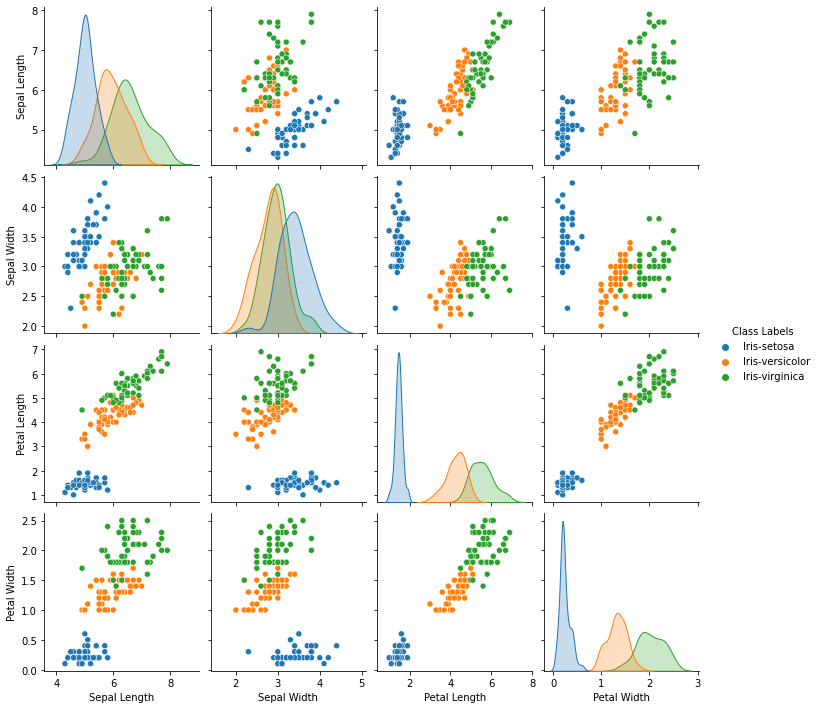

In [135]:
sns.pairplot(df, hue='Class Labels')

**Correlation Matric**
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range od -1 to +1. If two variable have high correlataion, we can neglect one variable from those two.

In [136]:
df.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


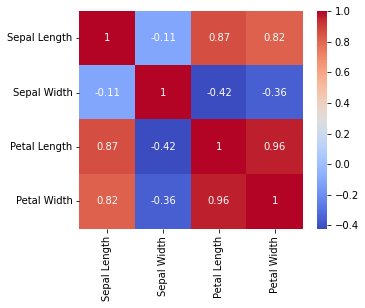

In [137]:
corr=df.corr()
fig, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True,ax=ax,cmap='coolwarm')


**Label Encoder:**
In machine learning, We usually deal with datasets which contains multiple labels in one or more than one columns. these labels can be in the form of words or numbers. Label encoding refers to the converting the labels into numeric form so as to convert it into the machine-readable form.

In [138]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [139]:
df['Class Labels']=le.fit_transform(df['Class Labels'])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Model Training**

In [140]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=df.drop(columns=['Class Labels'])
Y=df['Class Labels']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [141]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [142]:
#model training
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [143]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [144]:
#knn - K-nearest.neighbours
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

In [145]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [146]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [147]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()


In [148]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [149]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333
